In [1]:
%matplotlib notebook
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import colormaps as cmaps
import os
import scipy as sp
from scipy.ndimage.interpolation import rotate
from magpie_data import PolarimetryMap2, FaradayMap2, NeLMap2, Interferogram, OpticalFrames
import scipy.constants as c
from mcerp import N, umath, Gamma
import pickle

In [11]:
%cd "~\Google Drive\MAGPIE\data\2017\s0510_17 C asymmetric double exploder"
rot=-90-23.4
s0510_17_532=NeLMap2('s0510_17 532nm end on neL.txt', scale=1532//9, rot_angle=rot, multiply_by=1/1.6)
s=s0510_17_532
s.set_origin(origin=[2818,2231], extent=[-11.5,11.5,-8,8])

C:\Users\jdhare\Google Drive\MAGPIE\data\2017\s0510_17 C asymmetric double exploder


C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


<IPython.core.display.Javascript object>


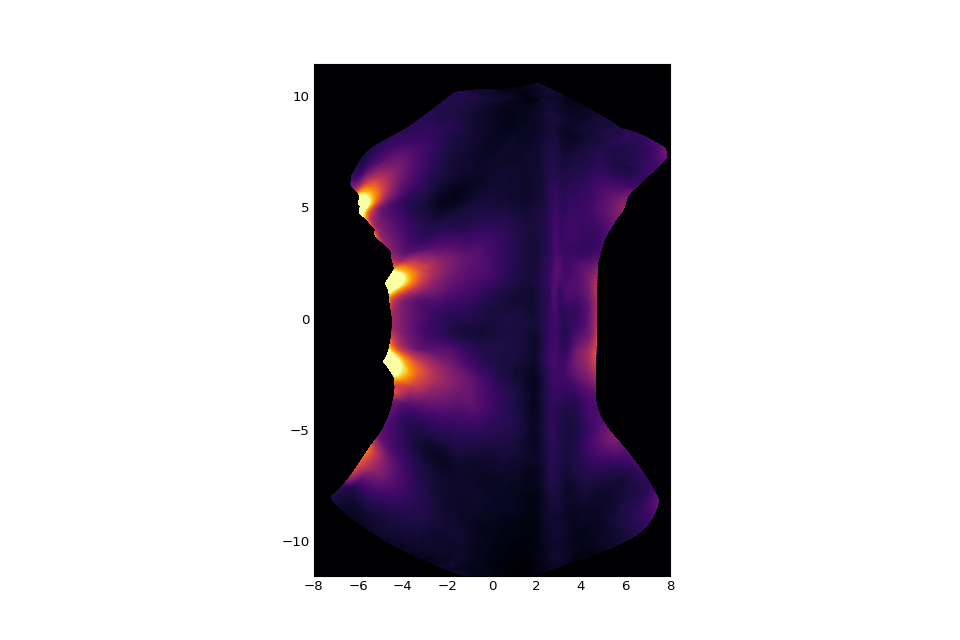

In [13]:
s.set_origin(origin=[2818,2231], extent=[-11.5,11.5,-8,8])
s.plot_data_mm(clim=[0,2], multiply_by=1e-18)

<IPython.core.display.Javascript object>


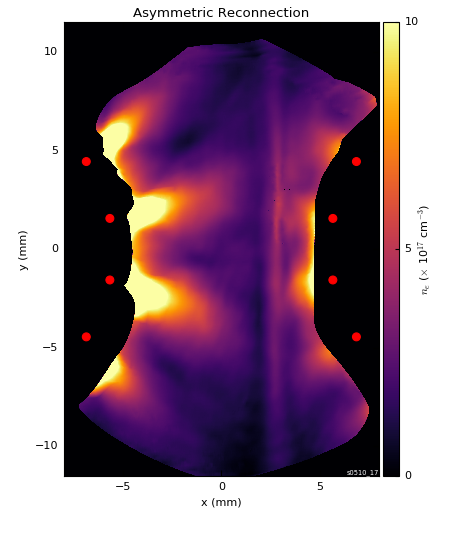

In [23]:
vv

In [24]:
folder=r"~\Google Drive\MAGPIE\data\2017\s0510_17 C asymmetric double exploder"
fn='s0510_17 532nm end on ne map.png'
p=os.path.expanduser(os.path.join(folder,fn))
fig.savefig(p, dpi=400, facecolor='w')

In [25]:
%cd "~\Google Drive\MAGPIE\data\2017\s0510_17 C asymmetric double exploder"
rot=-90-23.7
s0510_17_355=NeLMap2('s0510_17 355nm end on neL.txt', scale=1532//9, rot_angle=rot, multiply_by=1/1.6, flip_lr=True)
s=s0510_17_355
s.set_origin(origin=[2873,2122], extent=[-11.5,11.5,-8,8])

C:\Users\jdhare\Google Drive\MAGPIE\data\2017\s0510_17 C asymmetric double exploder


C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


<IPython.core.display.Javascript object>


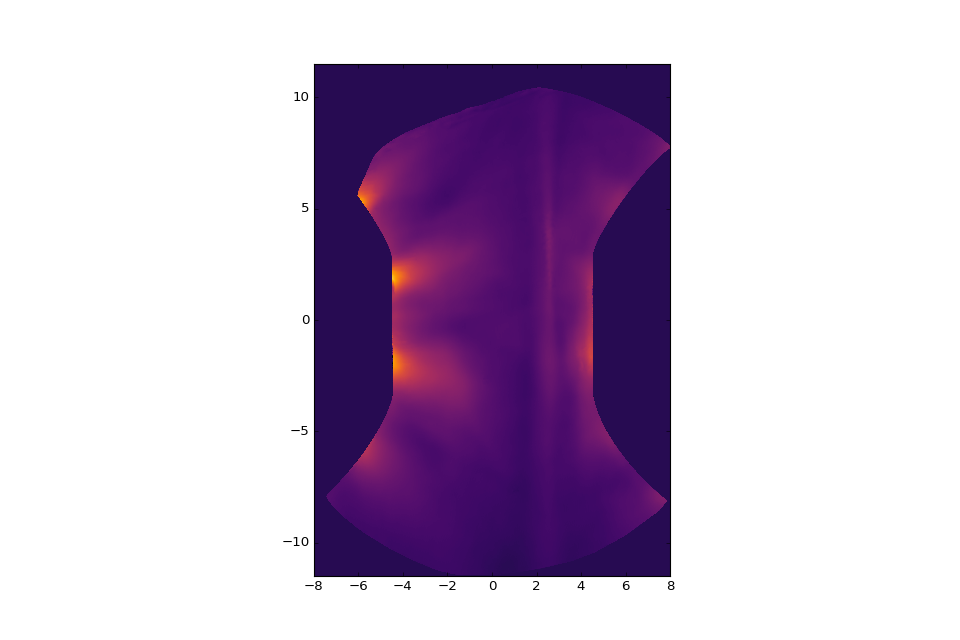

<IPython.core.display.Javascript object>


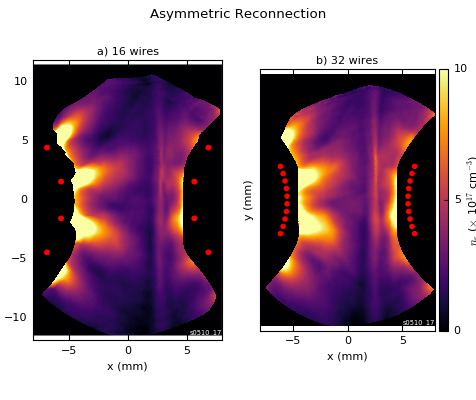

In [30]:
fig, ax=plt.subplots(1,2,figsize=(5.96,5), sharex=True, sharey=True)

clim=[0,10]

shots=[s0510_17_532, s0510_17_355]

for a, s in zip(ax, shots):
    ne_im=s.plot_data_mm(clim=clim, multiply_by=1e-17, ax=a)
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.set_ylabel('y (mm)',fontsize=10)
    #a.set_yticks([])
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
    a.text(s=s.fn, x=8, y=-11.5, fontsize=6, ha='right', va='bottom', color='white')


a=ax[0]
a.set_yticks([-10,-5,0,5,10])


#tweak the plots subtly.
fig.subplots_adjust(left=0.07, 
                    bottom=0.15, 
                    right=0.94, 
                    top=0.85,
                    wspace=0.2, 
                    hspace=0)

'''divider = make_axes_locatable(ax[0])
cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(ne_im, cax=cbar_ax, ticks=[0,5,10])
cbar_ax.set_ylabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10, labelpad=-2)
cbar_ax.tick_params(labelsize=10, pad=5, length=4, width=1)'''

divider = make_axes_locatable(ax[1])
cbar_ax1 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(ne_im, cax=cbar_ax1, ticks=[0,5,10])
cbar_ax1.set_ylabel(r'$n_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=10, labelpad=-2)
cbar_ax1.tick_params(labelsize=10, pad=5, length=4, width=1)

a=ax[0]
th=np.linspace(-360/32*3,360/32*3,4)
for t in th:
    c= plt.Circle((-13.5+8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
    a.add_artist(c)
    c= plt.Circle((13.5-8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
    a.add_artist(c)
        
a=ax[1]
th=np.linspace(-360/32*2,360/32*2,10)
for t in th:
    c= plt.Circle((-13.5+8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
    a.add_artist(c)
    c= plt.Circle((13.5-8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
    a.add_artist(c)

fig.suptitle('Asymmetric Reconnection', fontsize=12)

ax[0].set_title('a) 16 wires', fontsize=10)
ax[1].set_title('b) 32 wires', fontsize=10)

<IPython.core.display.Javascript object>


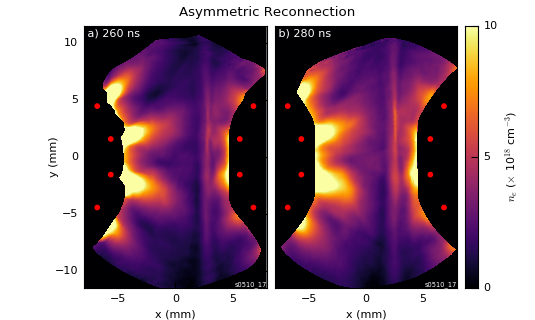

In [36]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig=plt.figure(figsize=(6.69,4))

grid = ImageGrid(fig, rect=(0.1,0.1,0.85,0.82),
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="edge",
                 cbar_size="7%",
                 cbar_pad=0.1,
                 )

#Interferograms

#neL maps

clim=[0,10]


s0510_17_532.plot_data_mm(ax=grid[0], clim=clim, multiply_by=1e-17)
bim=s0510_17_355.plot_data_mm(ax=grid[1], clim=clim, multiply_by=1e-17)

for a in grid:
    a.set_ylim([-11.5,11.5])
    a.set_xlabel('x (mm)',fontsize=10)
    a.set_xticks([-5,0,5])
    a.tick_params(labelsize=10, pad=5, length=5, width=1)
    
grid[0].set_ylabel('y (mm)', fontsize=10, labelpad=-4)


c=grid[1].cax.colorbar(bim, ticks=[0,5,10])
c.set_label_text(r'$n_e$ ($\times$ 10$^{18}$ cm$^{-3}$)',fontsize=10)
c.ax.tick_params(labelsize=10, pad=5, length=6, width=1)

#plt.subplots_adjust(bottom=0.2, left=0.1, top=0.95, right=0.99)

th=np.linspace(-360/32*3,360/32*3,4)
for t in th:
    for g in grid:
        c= plt.Circle((-13.5+8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
        g.add_artist(c)
        c= plt.Circle((13.5-8*np.cos(t*np.pi/180),8*np.sin(t*np.pi/180)), 0.2, color='r')
        g.add_artist(c)
        
fig.suptitle('Asymmetric Reconnection', fontsize=12)
        
grid[0].text(x=0.0, y=0.99, va='top',ha='left',s=r' a) 260 ns', color='white',fontsize=10,transform=grid[0].transAxes)
grid[1].text(x=0.0, y=0.99, va='top',ha='left',s=r' b) 280 ns', color='white',fontsize=10,transform=grid[1].transAxes)

grid[0].text(x=1, y=0.0, va='bottom',ha='right',s=r's0510_17', color='white',fontsize=6,transform=grid[0].transAxes)
grid[1].text(x=1, y=0.0, va='bottom',ha='right',s=r's0510_17', color='white',fontsize=6,transform=grid[1].transAxes)

In [37]:
folder=r"~\Google Drive\MAGPIE\data\2017\s0510_17 C asymmetric double exploder"
fn='s0510_17 end on ne maps.png'
p=os.path.expanduser(os.path.join(folder,fn))
fig.savefig(p, dpi=400, facecolor='w')